In [56]:
import os

os.chdir('/home/yry08/yigedabuliu/lkq/LiteMedSAM')

In [57]:
brats_data_root = '/mnt/sda3/yigedabuliu/lkq/data/Task01_BrainTumour/ori_datasets/'

### 需要将数据集转换为形状为 img:[3,H,W]   gt:[1,H,W]  box:[1,1,4]

In [58]:
# 读取数据
all_sequence = sorted(os.listdir(brats_data_root))

for sequence in all_sequence:
    #
    print(sequence)

BraTS2021_00000
BraTS2021_00002
BraTS2021_00003
BraTS2021_00005
BraTS2021_00006
BraTS2021_00008
BraTS2021_00009
BraTS2021_00011
BraTS2021_00012
BraTS2021_00014
BraTS2021_00016
BraTS2021_00017
BraTS2021_00018
BraTS2021_00019
BraTS2021_00020
BraTS2021_00021
BraTS2021_00022
BraTS2021_00024
BraTS2021_00025
BraTS2021_00026
BraTS2021_00028
BraTS2021_00030
BraTS2021_00031
BraTS2021_00032
BraTS2021_00033
BraTS2021_00035
BraTS2021_00036
BraTS2021_00043
BraTS2021_00044
BraTS2021_00045
BraTS2021_00046
BraTS2021_00048
BraTS2021_00049
BraTS2021_00051
BraTS2021_00052
BraTS2021_00053
BraTS2021_00054
BraTS2021_00056
BraTS2021_00058
BraTS2021_00059
BraTS2021_00060
BraTS2021_00061
BraTS2021_00062
BraTS2021_00063
BraTS2021_00064
BraTS2021_00066
BraTS2021_00068
BraTS2021_00070
BraTS2021_00071
BraTS2021_00072
BraTS2021_00074
BraTS2021_00077
BraTS2021_00078
BraTS2021_00081
BraTS2021_00084
BraTS2021_00085
BraTS2021_00087
BraTS2021_00088
BraTS2021_00089
BraTS2021_00090
BraTS2021_00094
BraTS2021_00095
BraTS202

image shape: (4, 240, 240, 155) 	 label shape (240, 240, 155)


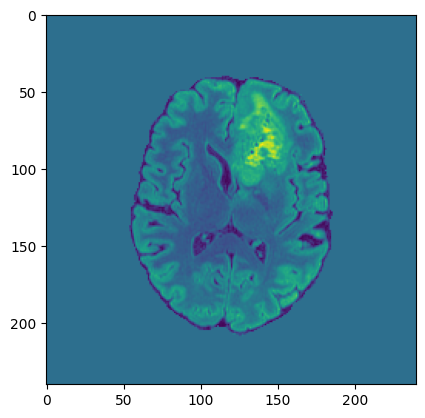

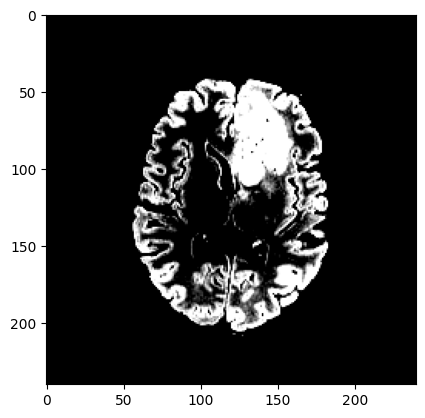

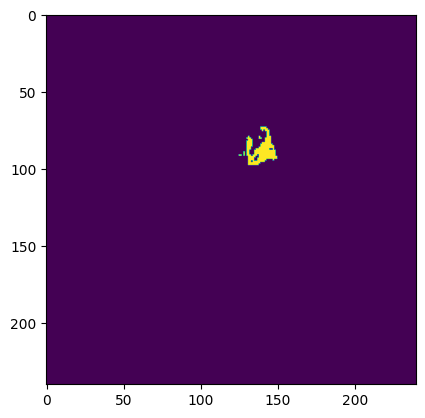

In [106]:
# 测试读取h5文件并将其转换为npy

import h5py
import matplotlib.pyplot as plt
import numpy as np

h5_path = '/mnt/sda3/yigedabuliu/lkq/data/Task01_BrainTumour/h5_datasets/BraTS2021_00000_mri_norm2.h5'

h5f = h5py.File(h5_path, 'r')
image = h5f['image'][:]
label = h5f['label'][:]

print('image shape:', image.shape, '\t', 'label shape', label.shape)


# 可视化单层
plt.imshow(image[0, :, :, 80])
plt.show()
# 将某一层扩充为(H,W,3)的灰度图片
single_img = image[0, :, :, 80].copy()
single_img = np.stack((single_img,) * 3, axis=-1)
single_img = np.clip(single_img, 0, 1)

# 展示
plt.imshow(single_img)
plt.show()

# 截取相应的标签
single_label = label.copy()
single_label = single_label[:, :, 81]

# 只保留原始标签为1的，即NT区域
mask = single_label != 1
single_label[mask] = 0
# 可视化
plt.imshow(single_label)
plt.show()

# image shape: (4, 240, 240, 155)          label shape (240, 240, 155)
# label set: [0 1 2 4]


In [107]:
single_label.shape

(240, 240)

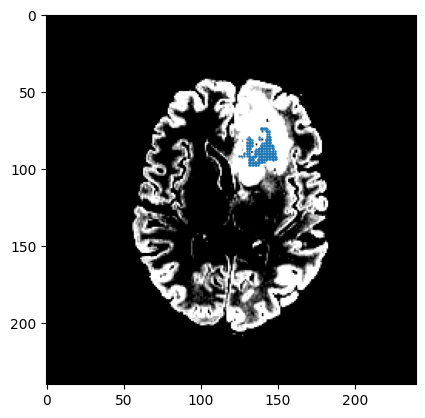

In [80]:
# 同时显示
import torch

new_gt = single_label
indices = torch.nonzero(torch.Tensor(new_gt))

plt.imshow(single_img)
plt.scatter(x=indices[:, 1], y=indices[:, 0], s=0.5)
plt.show()

In [82]:
# 根据掩码大小计算bbox

rows, cols = np.where(single_label == 1)

# 找到边界
top = np.min(rows)
bottom = np.max(rows)
left = np.min(cols)
right = np.max(cols)

In [104]:
coords =[[left,top],[right,bottom]]
coords = torch.tensor([[[left,top,right,bottom]]])

In [105]:
coords.shape

torch.Size([1, 1, 4])

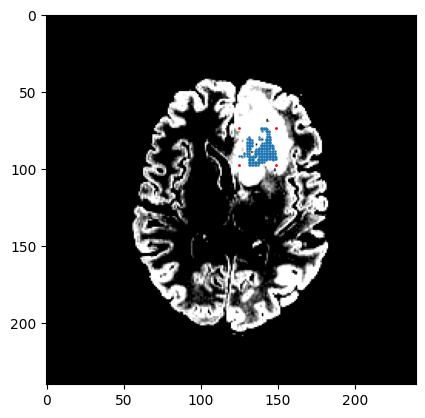

In [98]:
plt.imshow(single_img)
plt.scatter(x=indices[:, 1], y=indices[:, 0], s=0.5)

plt.scatter(x=coords[0][0], y=coords[0][1], s=1,c='r') # 左上
plt.scatter(x=coords[1][0], y=coords[0][1], s=1,c='r') # 右上
plt.scatter(x=coords[0][0], y=coords[1][1], s=1,c='r') # 左下
plt.scatter(x=coords[1][0], y=coords[1][1], s=1,c='r') # 右上
plt.show()